In [1]:
import numpy as np
import matplotlib.pyplot as plt
from andi_datasets.models_phenom import models_phenom




In [2]:
%load_ext autoreload
%autoreload 2

In [5]:
def plot_color_lines(traj, label, ax, cmp, dim = 1):
    
    if isinstance(label, int) or isinstance(label, float):
        if dim == 1:
            ax.plot(traj[:,0], c = cmp(label))
        if dim == 2:
            ax.plot(traj[:,0], traj[:,1], c = cmp(label))
    else:
        
        
        
        CPs = [0] + np.argwhere(label[1:] != label[:-1]).flatten().tolist() + [traj.shape[0]-1]

        for i, o in zip(CPs[:-1], CPs[1:]):
            if i==o: break
                
            lab_cp = np.round(label[i:o].mean())
            if lab_cp == 0: zorder = 1
            else: zorder = -1
            if dim == 1:
                ax.plot(np.arange(i, o+1), traj[i:o+1], c = cmp(lab_cp), zorder = zorder)
            elif dim == 2:
                ax.plot(traj[i:o+1, 0], traj[i:o+1, 1], c = cmp(lab_cp), zorder = zorder)
                

In [6]:
def norm(x):
    if len(np.unique(x)) == 1:
        return np.ones_like(x)*x[0]
    else:
        return (x - x.min()) / (x.max() - x.min())


In [7]:
import matplotlib.colors as clr
cmap = clr.LinearSegmentedColormap.from_list('custom blue', ['#2790DB','#DB403D'], N=256)

L = 200
fov = 128
pad = 50

# Single state

In [624]:
N = 30; 
as_hard = [0.9,0]
Ds_hard = [0.25, 0.4]

as_easy = [1,0]
Ds_easy = [0.25, 0]



s_hard, s_l_hard = models_phenom().single_state(N = N, T = 200, L = L, alphas = as_hard, Ds = Ds_hard)
s_easy, s_l_easy = models_phenom().single_state(N = N, T = 200, L = L, alphas = as_easy, Ds = Ds_easy)
s_l_hard = norm(s_l_hard[:,:,1].transpose())

s_hard[:,0,:] += -s_hard[0,0,:]+fov/2+pad
s_easy[:,0,:] += -s_easy[0,0,:]+fov/2+pad

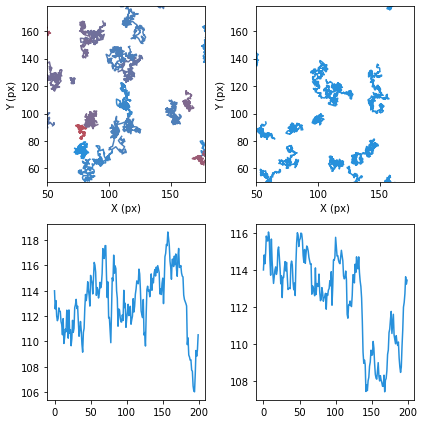

In [624]:
fig, axs = plt.subplots(2, 2, figsize = (6,6), tight_layout = True)

for idx, (tt, ll) in enumerate(zip(s_hard.transpose(1,0,2), lab_hard)):
    plot_color_lines(tt, ll[0],axs[0,0], cmp = cmap, dim = 2)   
    
for idx, tt in enumerate(s_easy[:, :, :].transpose(1,0,2)):
    plot_color_lines(tt, 0,axs[0,1], cmp = cmap, dim = 2)
    
plot_color_lines(s_hard[:,0,:], 0, axs[1,0], cmp = cmap, dim = 1)
plot_color_lines(s_easy[:,0,:], 0, axs[1,1], cmp = cmap, dim = 1)


plt.setp(axs[0], xlabel = 'X (px)', ylabel = 'Y (px)', xlim = (50,50+128), ylim=(50,50+128));

In [496]:
np.save('help/fig3/data/s_hard.npy', s_hard)
np.save('help/fig3/data/s_l_hard.npy', s_l_hard)
np.save('help/fig3/data/s_easy.npy', s_easy)
np.save('help/fig3/data/s_l_easy.npy', s_l_easy)

# 2-state

In [545]:
N = 30; 
as_hard = [[1,0], [0.9,0]]
Ds_hard = [[0.25,0], [0.25,0]]

as_easy = [[1.4,0], [0.6,0]]
Ds_easy = [[0.25,0], [0.25,0]]



M_easy = np.array([[0.99, 0.01],
                   [0.001, 0.999]])
M_hard = np.array([[0.9, 0.1],
                   [0.1, 0.9]])


m_hard, m_l_hard = models_phenom().multi_state(N = N, T = 200, L = L, alphas = as_hard, Ds = Ds_hard, M = M_hard)
m_easy, m_l_easy = models_phenom().multi_state(N = N, T = 200, L = L, alphas = as_easy, Ds = Ds_easy, M = M_easy, init_state=0)

m_hard[:,0,:] += -m_hard[0,0,:]+fov/2+pad
m_easy[:,0,:] += -m_easy[0,0,:]+fov/2+pad

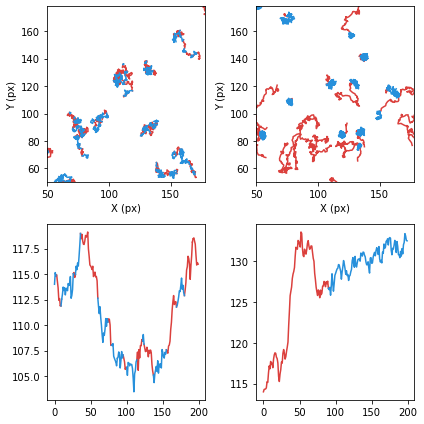

In [545]:
fig, axs = plt.subplots(2, 2, figsize = (6,6), tight_layout = True)

for idx, (tt, ll) in enumerate(zip(m_hard.transpose(1,0,2), m_l_hard.transpose(1,0,2))):
    plot_color_lines(tt, norm(ll[:,0]) ,axs[0,0], cmp = cmap, dim = 2)   
    
for idx, (tt, ll) in enumerate(zip(m_easy.transpose(1,0,2), m_l_easy.transpose(1,0,2))):
    plot_color_lines(tt, norm(ll[:,0]), axs[0,1], cmp = cmap, dim = 2)
    
plot_color_lines(m_hard[:,0,0], norm(m_l_hard[:,0,0]), axs[1,0], cmp = cmap, dim = 1)
plot_color_lines(m_easy[:,0,0], norm(m_l_easy[:,0,0]), axs[1,1], cmp = cmap, dim = 1)


plt.setp(axs[0], xlabel = 'X (px)', ylabel = 'Y (px)', xlim = (50,50+128), ylim=(50,50+128));

In [546]:
np.save('help/fig3/data/m_hard.npy', m_hard)
np.save('help/fig3/data/m_l_hard.npy', m_l_hard)
np.save('help/fig3/data/m_easy.npy', m_easy)
np.save('help/fig3/data/m_l_easy.npy', m_l_easy)

# Confinement

In [77]:
Ds_hard = [[0.25,0], [0.1,0]]
Ds_easy = [[0.25,0], [3*0.25,0]]
r_comp , L, Nc = (12, 200, 20)
comp_center = models_phenom._distribute_circular_compartments(Nc = Nc, r = r, L = L)

c_hard, c_l_hard = models_phenom().confinement(N = 200, T = 200, L = L, comp_center = comp_center, 
                                           trans = 0.2, Ds = Ds_hard, r = r)

c_easy, c_l_easy = models_phenom().confinement(N = 200, T = 200, L = L, comp_center = comp_center, 
                                           trans = 0, Ds = Ds_easy, r = r)
#c_hard[:,0,:] += -c_hard[0,0,:]+fov/2+pad
#c_easy[:,0,:] += -c_easy[0,0,:]+fov/2+pad

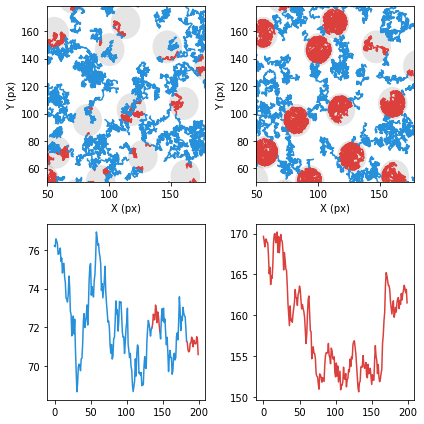

In [122]:
fig, axs = plt.subplots(2, 2, figsize = (6,6), tight_layout = True)

for idx, (tt, ll) in enumerate(zip(c_hard.transpose(1,0,2), c_l_hard.transpose(1,0,2))):
    plot_color_lines(tt, norm(ll[:,1]*(-1)) ,axs[0,0], cmp = cmap, dim = 2)   
    
for idx, (tt, ll) in enumerate(zip(c_easy.transpose(1,0,2), c_l_easy.transpose(1,0,2))):
    plot_color_lines(tt, norm(ll[:,1]), axs[0,1], cmp = cmap, dim = 2)
    
plot_color_lines(c_hard[:,8,0], norm(c_l_hard[:,8,1]*(-1)), axs[1,0], cmp = cmap, dim = 1)
idx_e = 20
plot_color_lines(c_easy[:,idx_e,0], norm(c_l_easy[:,idx_e,1]), axs[1,1], cmp = cmap, dim = 1)


for c in comp_center:
        circle1 = plt.Circle((c[0], c[1]), r_comp, facecolor = 'k', alpha = 0.1, lw = 0, zorder = -10)
        axs[0,0].add_patch(circle1) 
        circle2 = plt.Circle((c[0], c[1]), r_comp, facecolor = 'k', alpha = 0.1, lw = 0, zorder = -10)
        axs[0,1].add_patch(circle2)


plt.setp(axs[0], xlabel = 'X (px)', ylabel = 'Y (px)', xlim = (50,50+128), ylim=(50,50+128));

In [93]:
np.save('help/fig3/data/c_hard.npy', c_hard)
np.save('help/fig3/data/c_l_hard.npy', c_l_hard)
np.save('help/fig3/data/c_easy.npy', c_easy)
np.save('help/fig3/data/c_l_easy.npy', c_l_easy)
np.save('help/fig3/data/comp_center.npy', comp_center)

# Trapping

In [38]:
N = 80; r = 10; L = 200
Ds_hard = [0.5,0]
Ds_easy = [0.5,0]
alphas_easy = [1.2, 0]
Nt =300
trap_pos = np.random.rand(Nt, 2)*L

t_hard, t_l_hard = models_phenom().immobile_traps(N = N, T = 200, L = L, Pb = 1, Pu = 0.1, Ds = Ds_hard, Nt = Nt, traps_pos = trap_pos)
t_easy, t_l_easy = models_phenom().immobile_traps(N = N, T = 200, L = L, Pb = 1, Pu = 0, alphas = alphas_easy, Ds = Ds_easy, Nt = Nt, traps_pos = trap_pos)

#t_easy  += np.random.randn(t_easy.shape[0], t_easy.shape[1], t_easy.shape[2])*0.5
#t_hard  += np.random.randn(t_hard.shape[0], t_hard.shape[1], t_hard.shape[2])*0.5

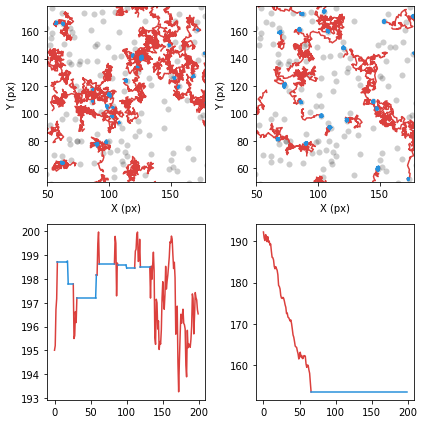

In [44]:
fig, axs = plt.subplots(2, 2, figsize = (6,6), tight_layout = True)

for idx, (tt, ll) in enumerate(zip(t_hard.transpose(1,0,2), t_l_hard.transpose(1,0,2))):
    plot_color_lines(tt + np.random.randn(tt.shape[0], tt.shape[1])*0.5,
                     norm(ll[:,-1]) ,axs[0,0], cmp = cmap, dim = 2)   
    
for idx, (tt, ll) in enumerate(zip(t_easy.transpose(1,0,2), t_l_easy.transpose(1,0,2))):
    plot_color_lines(tt + np.random.randn(tt.shape[0], tt.shape[1])*0.5,
                     norm(ll[:,-1]), axs[0,1], cmp = cmap, dim = 2)
    
plot_color_lines(t_hard[:,2,0], norm(t_l_hard[:,2,-1]), axs[1,0], cmp = cmap, dim = 1)
plot_color_lines(t_easy[:,0,0], norm(t_l_easy[:,0,-1]), axs[1,1], cmp = cmap, dim = 1)

for ax in axs:
    axs[0,0].scatter(trap_pos[:,0], trap_pos[:,1], zorder = -5,alpha = 0.1, c = 'k', lw = 0)
    axs[0,1].scatter(trap_pos[:,0], trap_pos[:,1], zorder = -5,alpha = 0.1, c = 'k', lw = 0)



plt.setp(axs[0], xlabel = 'X (px)', ylabel = 'Y (px)', xlim = (50,50+128), ylim=(50,50+128));

In [43]:
np.save('help/fig3/data/t_hard.npy', t_hard)
np.save('help/fig3/data/t_l_hard.npy', t_l_hard)
np.save('help/fig3/data/t_easy.npy', t_easy)
np.save('help/fig3/data/t_l_easy.npy', t_l_easy)
np.save('help/fig3/data/trap_pos.npy', trap_pos)

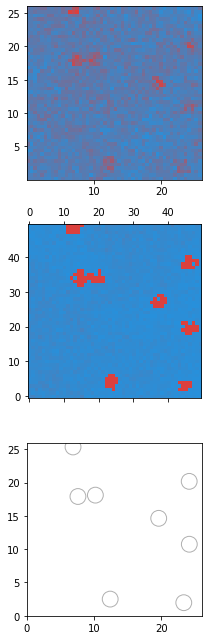

In [264]:

fig, axs = plt.subplots(3, 1, figsize = (3,9), tight_layout = True)
cmap = clr.LinearSegmentedColormap.from_list('custom blue', ['#2790DB','#DB403D'], N=256)

axs[0].hist2d(xh,yh, bins = 50, cmap = cmap, rasterized=True);

h = np.histogram2d(xe,ye, bins = 50)[0]#, cmap = cmap);
h[h > 250] = h.max()/50
axs[1].matshow(h.transpose(), cmap = cmap, origin='lower', rasterized=True)



# for ax in axs:
# axs[-1].hist2d(xe, ye, bins = 100)
axs[-1].scatter(trap_pos[:,0], trap_pos[:,1], alpha = 0.31, facecolor = 'none', edgecolor = 'k', s = 250)
plt.setp(axs[-1], xlim = (0, L), ylim = (0, L))

fig.savefig('help/fig3/histo_traps.svg')

# Dimerization

In [401]:
Nc = 15; r = 1; L = 250
Ds_hard = [[1,0], [1,0]]
Ds_easy = [[0.01,0], [0.01,0]]
alphas_easy = [[1.8,0], [1,0]]
N = 80

dim_hard, _ = models_phenom().dimerization(N = N, T = 150, L = L, Pb = 0.1, Pu = 0.2, Ds = Ds_hard)#
dim_easy, lab_easy = models_phenom().dimerization(N = N, T = 1000, L = L, Pb = 1, 
                                                  Pu = 0, r = 1, Ds = Ds_easy, alphas= alphas_easy)

In [24]:
r_dimer = 1; L = 200
Ds_hard = [[1,0], [0.9,0]]
Ds_easy = [[0.01,0], [0.01,0]]
alphas_easy = [[1.8,0], [1,0]]
N = 80

#d_hard, d_l_hard = models_phenom().dimerization(N = N, T = 200, L = L, Pb = 1, Pu = 0.2, 
#                                                Ds = Ds_hard, r = r_dimer)#
#d_easy, d_l_easy = models_phenom().dimerization(N = N, T = 200, L = L, Pb = 1, 
#                                                  Pu = 0, r = 1, Ds = Ds_easy, alphas= alphas_easy)

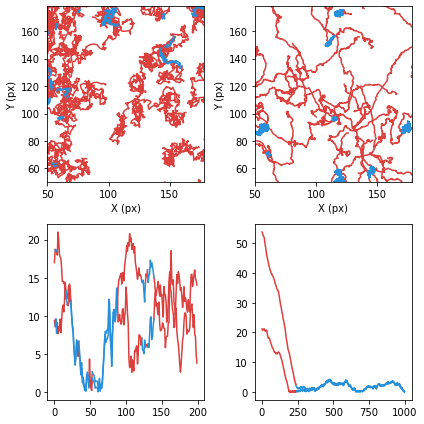

In [24]:
fig, axs = plt.subplots(2, 2, figsize = (6,6), tight_layout = True)

for idx, (tt, ll) in enumerate(zip(d_hard.transpose(1,0,2), d_l_hard.transpose(1,0,2))):
    plot_color_lines(tt, norm(ll[:,1]) ,axs[0,0], cmp = cmap, dim = 2)   
    
for idx, (tt, ll) in enumerate(zip(d_easy.transpose(1,0,2), d_l_easy.transpose(1,0,2))):
    plot_color_lines(tt, norm(ll[:,0]), axs[0,1], cmp = cmap, dim = 2)
    
plot_color_lines(d_hard[:,8,1], norm(d_l_hard[:,8,1]), axs[1,0], cmp = cmap, dim = 1)
plot_color_lines(d_hard[:,50,1], norm(d_l_hard[:,8,1]), axs[1,0], cmp = cmap, dim = 1)

plot_color_lines(d_easy[:,2,0], norm(d_l_easy[:,2,0]), axs[1,1], cmp = cmap, dim = 1)
plot_color_lines(d_easy[:,5,0], norm(d_l_easy[:,5,0]), axs[1,1], cmp = cmap, dim = 1)



plt.setp(axs[0], xlabel = 'X (px)', ylabel = 'Y (px)', xlim = (50,50+128), ylim=(50,50+128));

In [36]:
np.save('help/fig3/data/d_hard.npy', d_hard)
np.save('help/fig3/data/d_l_hard.npy', d_l_hard)
np.save('help/fig3/data/d_easy.npy', d_easy)
np.save('help/fig3/data/d_l_easy.npy', d_l_easy)

NameError: name 'trap_pos' is not defined

# All

In [27]:
s_hard = np.load('help/fig3/data/s_hard.npy', )
s_l_hard = np.load('help/fig3/data/s_l_hard.npy', )
s_easy = np.load('help/fig3/data/s_easy.npy')
s_l_easy = np.load('help/fig3/data/s_l_easy.npy', )

In [28]:
m_hard = np.load('help/fig3/data/m_hard.npy', )
m_l_hard = np.load('help/fig3/data/m_l_hard.npy', )
m_easy = np.load('help/fig3/data/m_easy.npy')
m_l_easy = np.load('help/fig3/data/m_l_easy.npy', )

In [29]:
c_hard = np.load('help/fig3/data/c_hard.npy', )
c_l_hard = np.load('help/fig3/data/c_l_hard.npy', )
c_easy = np.load('help/fig3/data/c_easy.npy')
c_l_easy = np.load('help/fig3/data/c_l_easy.npy', )

In [30]:
t_hard = np.load('help/fig3/data/t_hard.npy', )
t_l_hard = np.load('help/fig3/data/t_l_hard.npy', )
t_easy = np.load('help/fig3/data/t_easy.npy')
t_l_easy = np.load('help/fig3/data/t_l_easy.npy', )

In [26]:
d_hard = np.load('help/fig3/data/d_hard.npy', )
d_l_hard = np.load('help/fig3/data/d_l_hard.npy', )
d_easy = np.load('help/fig3/data/d_easy.npy')
d_l_easy = np.load('help/fig3/data/d_l_easy.npy', )

In [34]:
s_l_hard.shape

(30, 200)

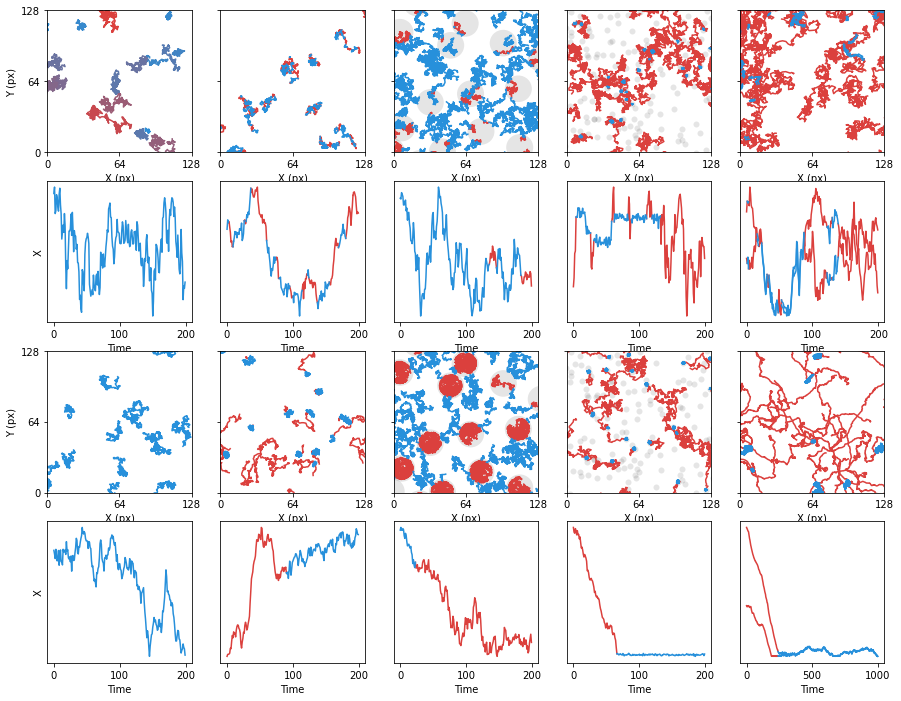

In [112]:
size=3
sigma_noise = 0.5
fig, axs = plt.subplots(4, 5, figsize = (5*size, 4*size))

###### SINGLE
for idx, (tt, ll) in enumerate(zip(s_hard.transpose(1,0,2), s_l_hard)):
    plot_color_lines(tt, ll[0],axs[0,0], cmp = cmap, dim = 2)   
    
for idx, tt in enumerate(s_easy[:, :, :].transpose(1,0,2)):
    plot_color_lines(tt, 0, axs[2,0], cmp = cmap, dim = 2)
    
plot_color_lines(s_hard[:,0,:], 0, axs[1,0], cmp = cmap, dim = 1)
plot_color_lines(s_easy[:,0,:], 0, axs[3,0], cmp = cmap, dim = 1)


###### MULTI
for idx, (tt, ll) in enumerate(zip(m_hard.transpose(1,0,2), m_l_hard.transpose(1,0,2))):
    plot_color_lines(tt, norm(ll[:,0]) ,axs[0,1], cmp = cmap, dim = 2)   
    
for idx, (tt, ll) in enumerate(zip(m_easy.transpose(1,0,2), m_l_easy.transpose(1,0,2))):
    plot_color_lines(tt, norm(ll[:,0]), axs[2,1], cmp = cmap, dim = 2)  
    
plot_color_lines(m_hard[:,0,0], norm(m_l_hard[:,0,0]), axs[1,1], cmp = cmap, dim = 1)
plot_color_lines(m_easy[:,0,0], norm(m_l_easy[:,0,0]), axs[3,1], cmp = cmap, dim = 1)


###### CONFINEMENT
for idx, (tt, ll) in enumerate(zip(c_hard.transpose(1,0,2), c_l_hard.transpose(1,0,2))):
    plot_color_lines(tt, norm(ll[:,1]*(-1)) ,axs[0,2], cmp = cmap, dim = 2)   
    
for idx, (tt, ll) in enumerate(zip(c_easy.transpose(1,0,2), c_l_easy.transpose(1,0,2))):
    plot_color_lines(tt, norm(ll[:,1]), axs[2,2], cmp = cmap, dim = 2)
    
plot_color_lines(c_hard[:,8,0], norm(c_l_hard[:,8,1]*(-1)), axs[1,2], cmp = cmap, dim = 1)
plot_color_lines(c_easy[:,9,0], norm(c_l_easy[:,9,1]), axs[3,2], cmp = cmap, dim = 1)


for c in comp_center:
        circle1 = plt.Circle((c[0], c[1]), r_comp, facecolor = 'k', alpha = 0.1, lw = 0, zorder = -10)
        axs[0,2].add_patch(circle1) 
        circle2 = plt.Circle((c[0], c[1]), r_comp, facecolor = 'k', alpha = 0.1, lw = 0, zorder = -10)
        axs[2,2].add_patch(circle2)


###### TRAPPING
for idx, (tt, ll) in enumerate(zip(t_hard.transpose(1,0,2), t_l_hard.transpose(1,0,2))):
    plot_color_lines(tt + np.random.randn(tt.shape[0], tt.shape[1])*sigma_noise, norm(ll[:,-1]) ,axs[0,3], cmp = cmap, dim = 2)   
    
for idx, (tt, ll) in enumerate(zip(t_easy.transpose(1,0,2), t_l_easy.transpose(1,0,2))):
    plot_color_lines(tt  + np.random.randn(tt.shape[0], tt.shape[1])*sigma_noise
                     , norm(ll[:,-1]), axs[2,3], cmp = cmap, dim = 2)
    
plot_color_lines(t_hard[:,2,0] + np.random.randn(tt.shape[0])*sigma_noise/3, 
                 norm(t_l_hard[:,2,-1]), axs[1,3], cmp = cmap, dim = 1)
plot_color_lines(t_easy[:,0,0] + np.random.randn(tt.shape[0])*sigma_noise/3,
                 norm(t_l_easy[:,0,-1]), axs[3,3], cmp = cmap, dim = 1)

axs[0,3].scatter(trap_pos[:,0], trap_pos[:,1], zorder = -5,alpha = 0.1, c = 'k', lw = 0)
axs[2,3].scatter(trap_pos[:,0], trap_pos[:,1], zorder = -5,alpha = 0.1, c = 'k', lw = 0)

####### DIMERIZATION
for idx, (tt, ll) in enumerate(zip(d_hard.transpose(1,0,2), d_l_hard.transpose(1,0,2))):
    plot_color_lines(tt, norm(ll[:,1]) ,axs[0,4], cmp = cmap, dim = 2)   
    
for idx, (tt, ll) in enumerate(zip(d_easy.transpose(1,0,2), d_l_easy.transpose(1,0,2))):
    plot_color_lines(tt, norm(ll[:,0]), axs[2,4], cmp = cmap, dim = 2)
    
plot_color_lines(d_hard[:,8,1], norm(d_l_hard[:,8,1]), axs[1,4], cmp = cmap, dim = 1)
plot_color_lines(d_hard[:,50,1], norm(d_l_hard[:,8,1]), axs[1,4], cmp = cmap, dim = 1)

plot_color_lines(d_easy[:,2,0], norm(d_l_easy[:,2,0]), axs[3,4], cmp = cmap, dim = 1)
plot_color_lines(d_easy[:,5,0], norm(d_l_easy[:,5,0]), axs[3,4], cmp = cmap, dim = 1)


plt.setp(axs[::2,:],  xlabel = 'X (px)',
         xlim = (50,50+128), ylim=(50, 50+128), 
         xticks = [50, 50+128/2, 50+128], xticklabels = np.array([0, int(128/2), 128]),
         yticks = [50, 50+128/2, 50+128], yticklabels = np.array([0, int(128/2), 128]));

plt.setp(axs[::2,0], ylabel = 'Y (px)');
plt.setp(axs[::2,1:], yticklabels = []);

plt.setp(axs[1::2,:], yticks = [], xlabel = 'Time');
plt.setp(axs[1::2,0], ylabel = 'X');


fig.savefig('dataset_scheme.svg')


In [109]:
np.arange(4)[1::2]

array([1, 3])

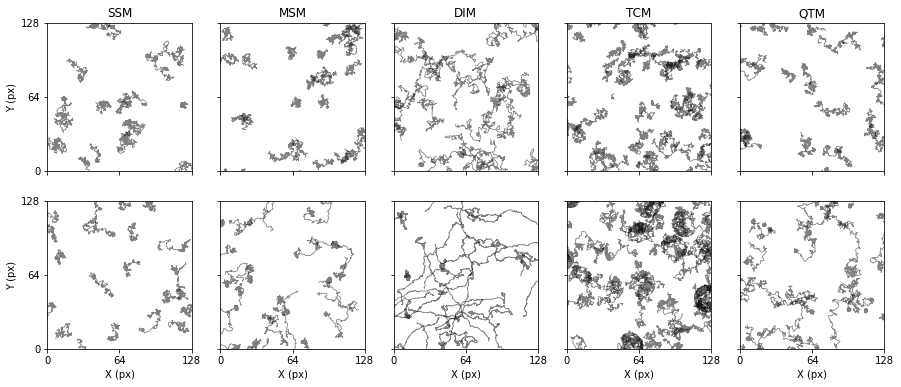

In [386]:
size = 3
fig, axs = plt.subplots(2, 5, figsize = (5*size, 2*size))

sigma_noise = 0.1

# SINGLE
for idx, tt in enumerate(s_hard[:, :, :].transpose(1,0,2)):
    og_traj = tt.copy()
    og_traj += np.random.randn(og_traj.shape[0], og_traj.shape[1])*sigma_noise
    axs[0, 0].plot(og_traj[:, 0], og_traj[:, 1], c = 'k', alpha = 0.5, lw = 0.8, zorder = -2)    
for idx, tt in enumerate(s_easy[:, :, :].transpose(1,0,2)):
    og_traj = tt.copy()
    og_traj += np.random.randn(og_traj.shape[0], og_traj.shape[1])*sigma_noise
    axs[1, 0].plot(og_traj[:, 0], og_traj[:, 1], c = 'k', alpha = 0.5, lw = 0.8, zorder = -2)

# 2-STATE
for idx, tt in enumerate(twoS_hard[:, :, :].transpose(1,0,2)):
    og_traj = tt.copy()
    og_traj += np.random.randn(og_traj.shape[0], og_traj.shape[1])*sigma_noise
    axs[0, 1].plot(og_traj[:, 0], og_traj[:, 1], c = 'k', alpha = 0.5, lw = 0.8, zorder = -2)    
for idx, tt in enumerate(twoS_easy[:, :, :].transpose(1,0,2)):
    og_traj = tt.copy()
    og_traj += np.random.randn(og_traj.shape[0], og_traj.shape[1])*sigma_noise
    axs[1, 1].plot(og_traj[:, 0], og_traj[:, 1], c = 'k', alpha = 0.5, lw = 0.8, zorder = -2)


# DIMERIZATION
for idx, tt in enumerate(dim_hard[:, :, :].transpose(1,0,2)):
    og_traj = tt.copy()
    og_traj += np.random.randn(og_traj.shape[0], og_traj.shape[1])*sigma_noise
    axs[0, 2].plot(og_traj[:, 0], og_traj[:, 1], c = 'k', alpha = 0.5, lw = 0.8, zorder = -2)    
for idx, tt in enumerate(dim_easy[:, :, :].transpose(1,0,2)):
    og_traj = tt.copy()
    og_traj += np.random.randn(og_traj.shape[0], og_traj.shape[1])*sigma_noise
    axs[1, 2].plot(og_traj[:, 0], og_traj[:, 1], c = 'k', alpha = 0.5, lw = 0.8, zorder = -2)

plt.setp(axs[:,2], xlim = (50, 50+128), ylim=(50, 50+128));
    
# CONFINEMENT
for idx, tt in enumerate(conf_hard[:, :, :].transpose(1,0,2)):
    og_traj = tt.copy()
    og_traj += np.random.randn(og_traj.shape[0], og_traj.shape[1])*sigma_noise
    axs[0, 3].plot(og_traj[:, 0], og_traj[:, 1], c = 'k', alpha = 0.5, lw = 0.8, zorder = -2)    
for idx, tt in enumerate(conf_easy[:, :, :].transpose(1,0,2)):
    og_traj = tt.copy()
    og_traj += np.random.randn(og_traj.shape[0], og_traj.shape[1])*sigma_noise
    axs[1, 3].plot(og_traj[:, 0], og_traj[:, 1], c = 'k', alpha = 0.5, lw = 0.8, zorder = -2)

# TRAPPING
for idx, tt in enumerate(trap_hard[:, :, :].transpose(1,0,2)):
    og_traj = tt.copy()    
    og_traj += np.random.randn(og_traj.shape[0], og_traj.shape[1])*sigma_noise
    axs[0, -1].plot(og_traj[:, 0], og_traj[:, 1], c = 'k', alpha = 0.5, lw = 0.8, zorder = -2)    
for idx, tt in enumerate(trap_easy[:, :, :].transpose(1,0,2)):
    og_traj = tt.copy()
    og_traj += np.random.randn(og_traj.shape[0], og_traj.shape[1])*sigma_noise*7
    axs[1, -1].plot(og_traj[:, 0], og_traj[:, 1], c = 'k', alpha = 0.5, lw = 0.8, zorder = -2)   
    

    


plt.setp(axs,  xlim = (50,50+128), ylim=(50, 50+128), 
         xticks = [50, 50+128/2, 50+128], xticklabels = np.array([0, int(128/2), 128]),
         yticks = [50, 50+128/2, 50+128], yticklabels = np.array([0, int(128/2), 128]));
plt.setp(axs[:,1:], yticklabels = [])
plt.setp(axs[0,:], xticklabels = [])
plt.setp(axs[:, 0], ylabel = 'Y (px)')
plt.setp(axs[-1, :], xlabel = 'X (px)')
;

for ax, name in zip(axs[0,:], ['SSM', 'MSM', 'DIM', 'TCM', 'QTM']):
    ax.set_title(name)

# fig.savefig('help/fig3/panel_c.svg')

# Matrix data